<center> <h1>Autocorrelación de datos de series temporales en Python</h1> </center>
<center> <h5>Zack West |  Tutoriales</h5> </center>

# 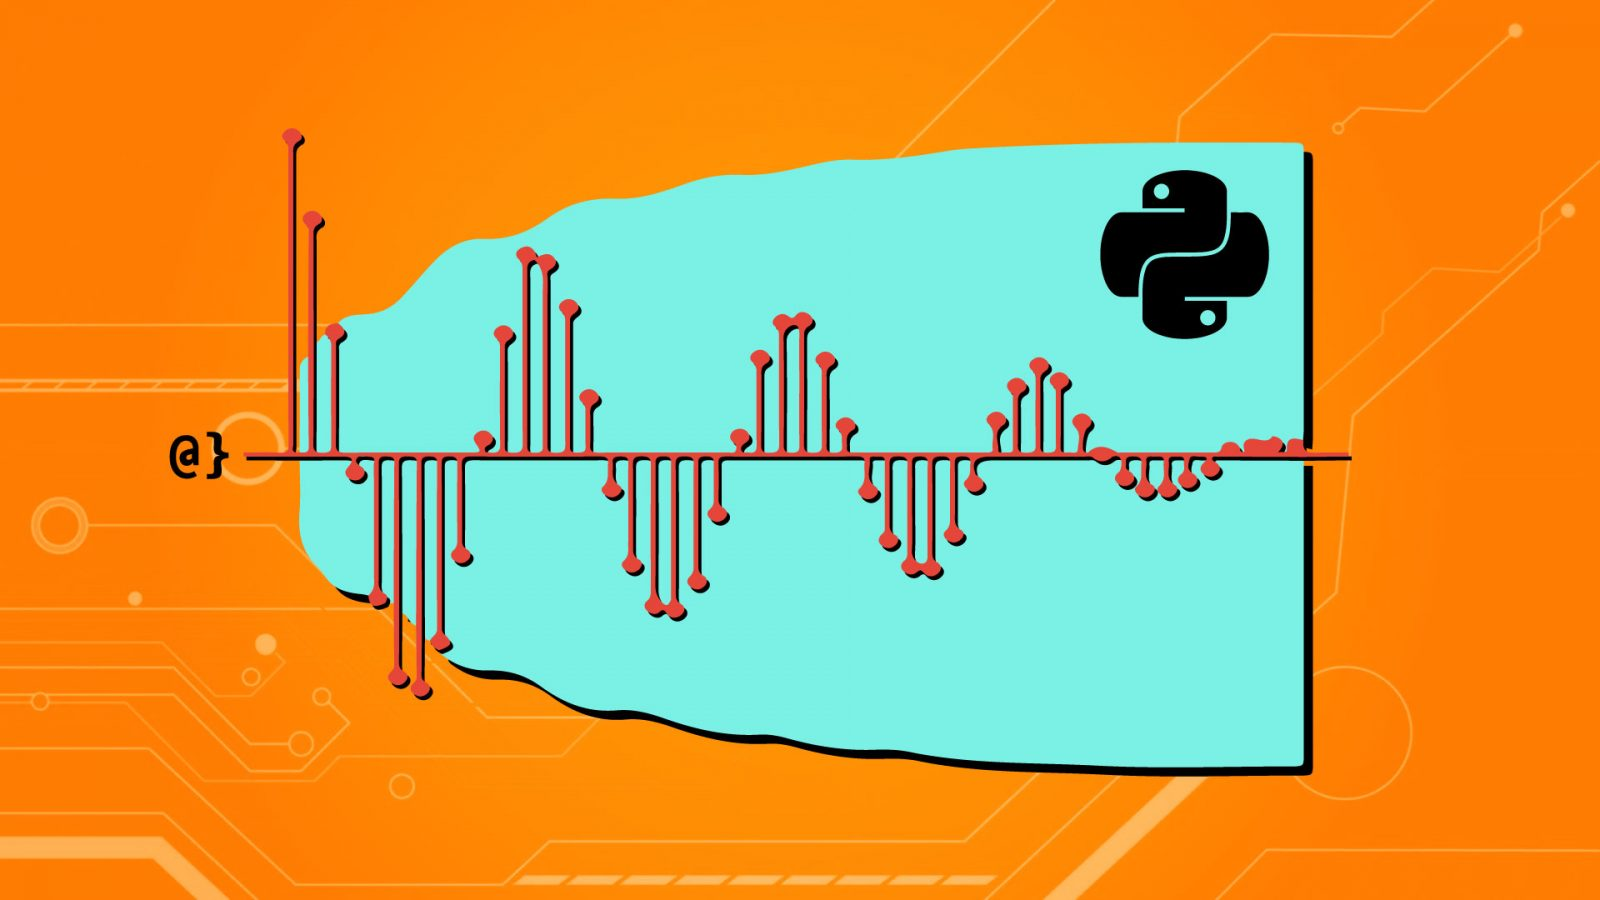




<h1>La autocorrelación (ACF) es un valor calculado que se usa para representar qué tan similar es un valor dentro de una serie de tiempo a un valor anterior. La biblioteca Statsmoldels simplifica mucho el cálculo de la autocorrelación en Python. Con unas pocas líneas de código, se pueden obtener conocimientos prácticos sobre los valores observados en los datos de series temporales.</h1>


##**Tabla de contenido**

1. Introducción
2. Cálculo de la autocorrelación en Python
3. Paso 1: obtener datos de series temporales
4. Paso 2: Inspeccionar y limpiar datos
5. Paso 3: Visualizar datos
6. Paso 4: Realizar Autocorrelación y Visualización
7. Paso 4: Interpretación de la Autocorrelación
8. Aplicaciones
9. Datos de mareas
10. Contaminación del aire
11. Limitaciones
12. Demasiada información retenida
13. pensamientos finales
14. Referencias

El ACF se puede utilizar para identificar tendencias en los datos y la influencia de los valores observados anteriormente en una observación actual. Las aplicaciones del ACF son amplias, pero sobre todo se pueden utilizar para el procesamiento de señales, la previsión meteorológica y el análisis de valores. ¡A veces, incluso puedes descubrir tendencias ocultas que son cualquier cosa menos intuitivas!

**TL; DR:** encontrar la autocorrelación en Python para datos de series temporales es fácil cuando se usa la función *plot_acf de statsmodels* como tal:



In [ ]:
import dataclasses
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
ruta_archivo = '/content/drive/MyDrive/Computacion estadistica/Datos_Actividad_TemperaturasPromedioAnual.xlsx'

# Have some time series data (via pandas)
data = pd.ExcelFile(ruta_archivo)
data



<h1>Introducción</h1>

La autocorrelación, también llamada correlación en serie, es utilizada por comerciantes de acciones, meteorólogos, químicos y más para pronosticar valores futuros dados datos históricos de series temporales. Ese es un aspecto crucial para calcular tanto la autocorrelación como las autocorrelaciones parciales: datos anteriores. Este tipo de análisis regresivo se utiliza para ayudar a predecir precios futuros dentro de un intervalo de confianza (típicamente 95%) y relaciona un valor actual con los anteriores.

La autocorrelación estima la influencia de **todos los valores observados en el pasado** sobre el valor observado actualmente. Esto difiere de la autocorrelación parcial en la que **solo se mide un único valor observado en el pasado** para determinar la influencia en el valor observado actualmente.

<h1>Cálculo de la autocorrelación en Python</h1>

Aprender a encontrar la autocorrelación en Python es bastante simple, pero con algunas consideraciones adicionales, veremos cómo y dónde se puede aplicar esta función y dónde y cuándo puede fallar. Primero, repasemos algunas definiciones rápidas:

1. **Retraso -** el número de observaciones anteriores medidas durante la autocorrelación.
2. **Correlación positiva -** una relación en la que el aumento de un valor predice un aumento en otro.
3. **Correlación negativa -** una relación en la que el aumento de un valor predice una disminución en otro.
4. **Intervalo de confianza -** un rango calculado de valores en el que probablemente contendría un valor desconocido para los datos muestreados.
5. **Nivel de confianza -** probabilidad de que un intervalo de confianza contenga un valor observado.

Comprender estos términos no es esencial para crear un gráfico de autocorrelación en Python, ¡pero mejorará en gran medida nuestra capacidad para interpretar ese gráfico! En este artículo, utilizaremos la función plot_acf de la biblioteca *statsmodel* para analizar datos de series temporales y trazar la función de autocorrelación. ¡Usaremos *Pandas, Statsmodel, matplotlib* y, por supuesto, Python!

**Nota:** Para una discusión más profunda, más matemática, sobre cómo calcular los valores de autocorrelación, sugiero [leer este artículo](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm). Nuestra discusión aquí no tocará los puntos más finos del cálculo de la función ACF y más sobre la representación visual y la interpretación.

<h1>Paso 1: obtener datos de series temporales</h1>

El primer paso es obvio: necesitamos obtener algunos datos. La generación de datos de series temporales aleatorias puede ser una herramienta útil para explorar herramientas de análisis como *statsmodels y matplotlib*. Sin embargo, los datos generados aleatoriamente no reflejarán las tendencias que aparecerán en el análisis autorregresivo. Dado este conocimiento, utilizaremos datos históricos de acciones de $TSLA para este artículo. Echemos un vistazo a nuestros datos:


In [ ]:
import pandas as pd
# Read in CSV data to Dataframe
df = pd.read_csv('/content/drive/MyDrive/Computacion estadistica/Precipitaciones_Totales_Mensuales.csv')
# Drop all columns but 'Date' and 'Adj Close', reindex using 'Date'
df = df[['AÑO', 'ENERO']].set_index(['AÑO'])
# View data
df


,ENERO
AÑO,
1995,0.0
1996,295.9
1997,294.2
1998,144.3
1999,78.3
...,...
2015,3.5
2014,5.8
2016,43.0


Como podemos ver, ahora tenemos 376 precios registrados desde el 01-01-2020 hasta el 30-06-2021, lo que refleja un aumento porcentual del 691,103%. No está mal: ¡si tan solo hubiéramos estado haciendo algo de autocorrelación a principios de 2020, podríamos haber estado surfeando esa ola!

<h1>Paso 2: inspeccionar y limpiar datos</h1>

Antes de realizar una autocorrelación en nuestra serie temporal, debemos inspeccionar los datos en busca de valores faltantes. Afortunadamente, Pandas ofrece varias herramientas convenientes para encontrar y reemplazar valores faltantes en datos de series temporales. No entraremos en todas las opciones y consideraciones para tal operación en este artículo. En cambio, hagamos una verificación rápida para ver si faltan valores:

In [ ]:
# Check if any null or NaN values in data
df.isnull().sum()


ENERO    0
dtype: int64

Al usar el método isnull().sum() de Pandas, se nos dice que nuestra única columna sin índice Adj Close contiene cero valores nulos o NaN. Esto significa que podemos pasar al siguiente paso y comenzar a visualizar nuestros datos.


**Nota:** [Consulte este artículo](https://www.alpharithms.com/fix-a-missing-value-in-pandas-dataframe-334915/) para obtener una discusión detallada sobre otras formas de encontrar y reemplazar datos faltantes usando Pandas.

<h1>Paso 3: visualizar datos</h1>

Antes de calcular una autocorrelación, será útil comprender cómo se ven visualmente nuestros datos. Esto puede ayudar a detectar posibles tendencias, informarnos si es probable que los datos no tengan una correlación lineal o hacer evidente una serie de otros problemas que podrían afectar la forma en que elegimos avanzar.

En algunos casos, visualizar los datos puede ayudarnos a darnos cuenta de que debemos dar un paso atrás y reevaluar nuestras prácticas de inspección y limpiar mejor los datos. Para este paso, usaremos un gráfico de líneas simple a través de *matplotlib*:




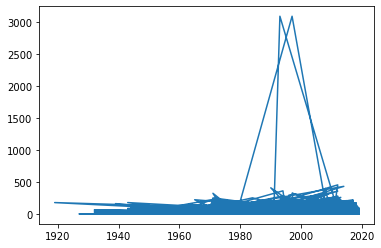

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df)
plt.show()



Esto nos permite saber que nuestros datos reflejan una tendencia ascendente constante que habíamos adivinado después de calcular el aumento porcentual de nuestros valores anteriormente. Dado que no hay caídas masivas en los valores graficados, diría que nuestra verificación de datos faltantes fue exitosa. ¡Ahora podemos pasar a la autocorrelación!

<h1>Paso 4: Realizar Autocorrelación y Visualización</h1>

Ahora que tenemos confianza en nuestros datos, podemos proceder a generar una visualización de autocorrelación utilizando *statsmodel, pandas, matplotlib y Python*. Estos módulos se han abstraído en gran medida y todo este proceso se puede realizar en solo unas pocas líneas de código:

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(data=data, lags=50)
# Show the AR as a plot
plt.show()

Vemos que se necesitan dos importaciones: *pyplot* y la función *plot_acf* de *statsmodels* para crear la visualización. Afortunadamente, estas dos bibliotecas funcionan bien juntas y se hace referencia implícita al gráfico de *pyplot*. Esto da como resultado la siguiente trama:
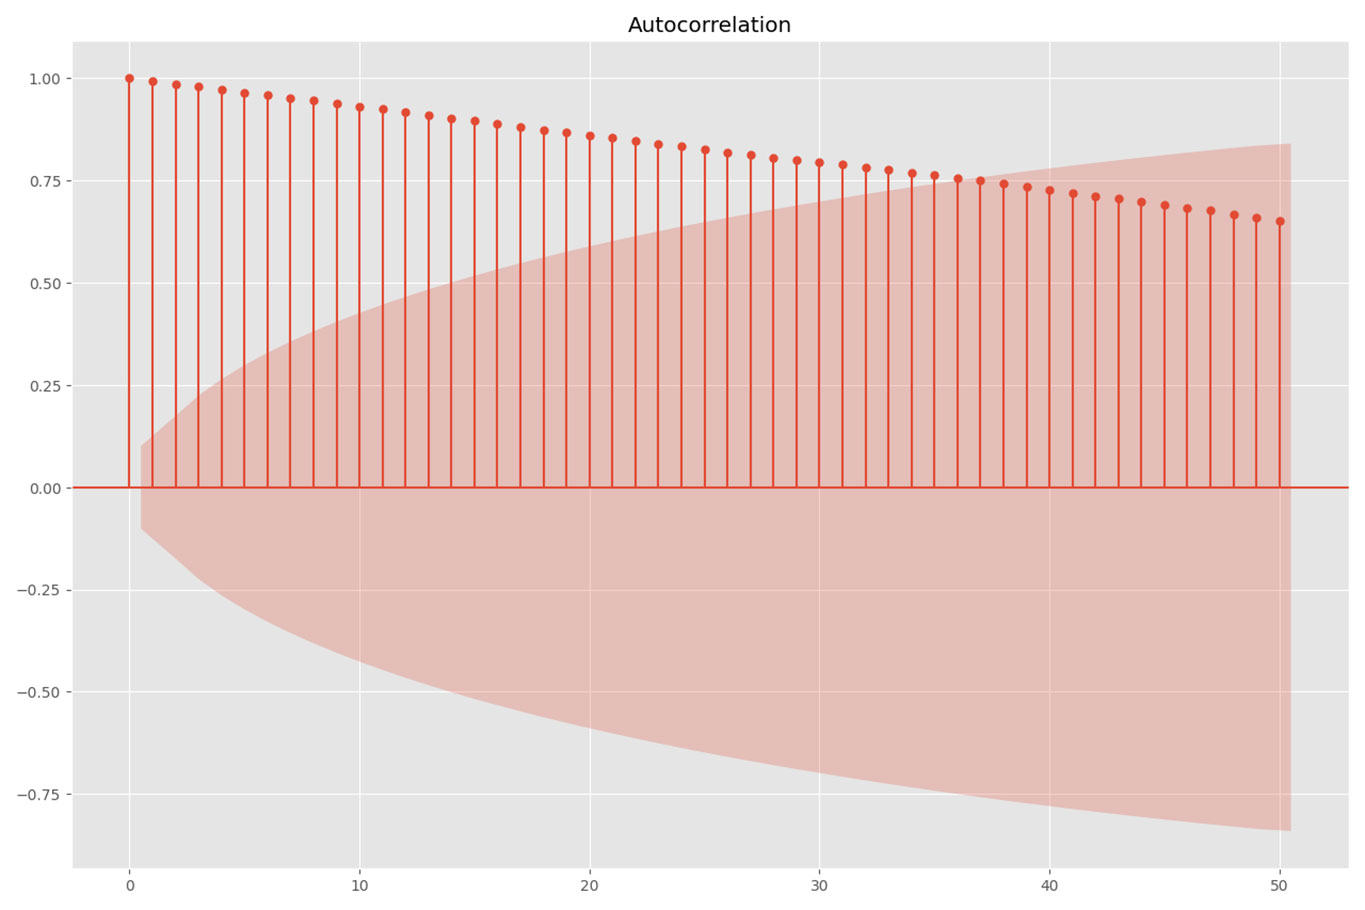

¡Esto parece bastante interesante pero en última instancia no ofrece mucha utilidad sin saber cómo leerlo! La región sombreada en rojo es el intervalo de confianza con un valor predeterminado de α = 0,05. Cualquier cosa dentro de este rango representa un valor que no tiene una correlación significativa con el valor más reciente del precio.

Las líneas verticales con marcadores en su parte superior son los "retrasos" que representan un número específico (50, en este caso) de valores anteriores. Estos representan el valor de correlación (que se muestra en el eje y) y disminuyen a un ritmo constante a medida que aumenta su proximidad al precio actual. Ese no es el caso con todos los datos, pero sí con los nuestros.

<h1>Paso 4: Interpretación de la Autocorrelación</h1>

Esto nos permite saber que los precios anteriores influyen en el precio actual, pero la importancia de esa influencia disminuye constantemente con el tiempo. Específicamente, los valores más allá del 36º día de negociación anterior no tienen un poder predictivo significativo sobre el precio actual.

La fuerza de esta relación se mide en una escala de -1 a 1, siendo -1 una correlación negativa del 100 % y siendo 1 una correlación positiva del 100 %. Esta medida se muestra en el eje y. Considere el siguiente diagrama para una interpretación más visual:

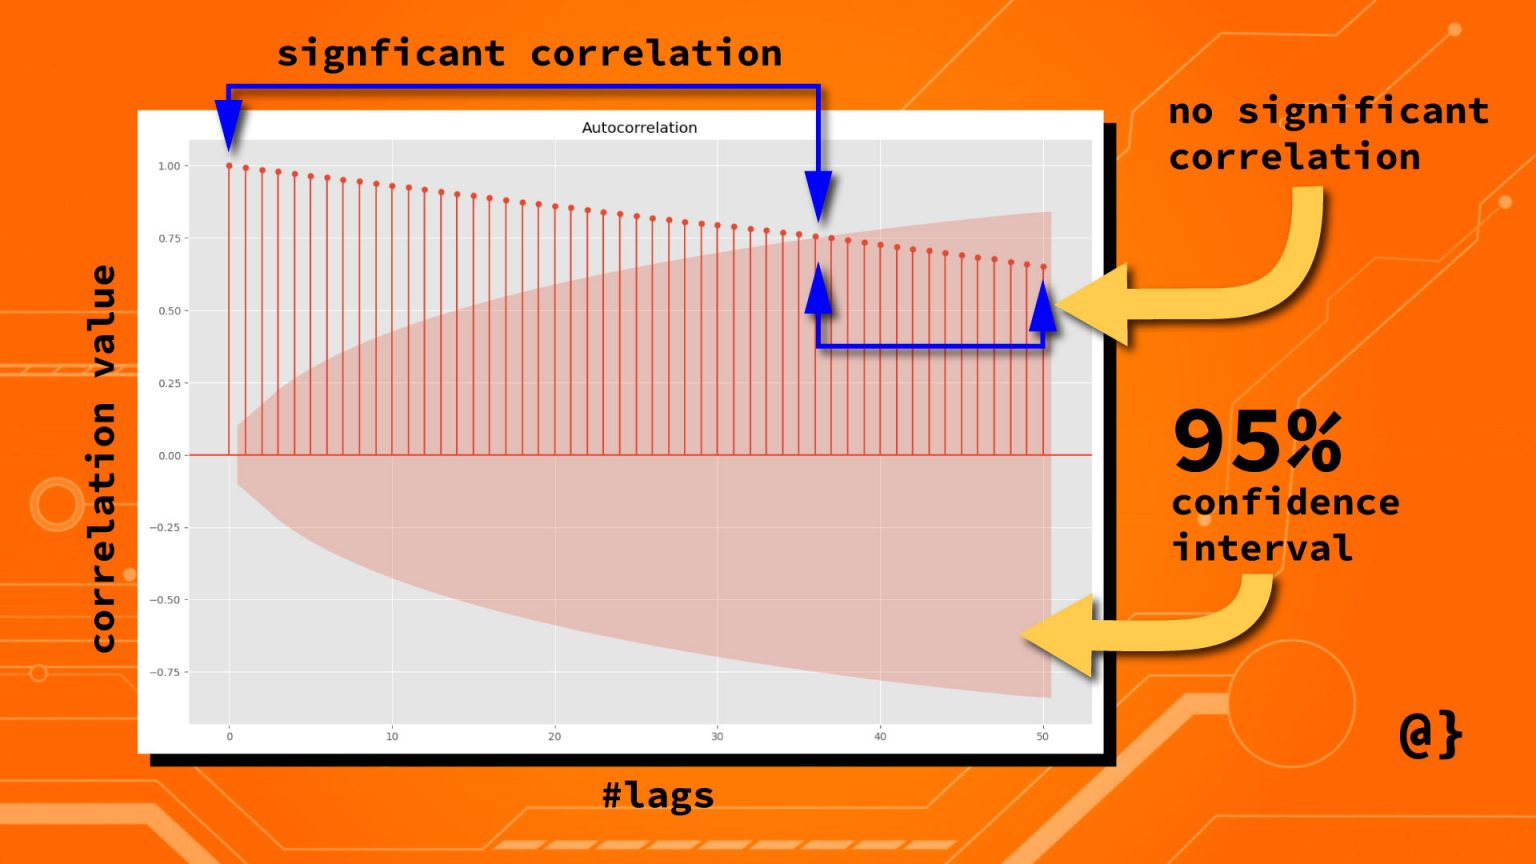



<h1>Aplicaciones</h1>

Hemos visto con qué facilidad se pueden visualizar los datos de autocorrelación usando la biblioteca. Hemos visto cómo interpretar estas representaciones visuales para [con suerte] obtener información sobre patrones más profundos reflejados en ciertos datos observables. Nuestros datos de precios históricos para $TSLA no fueron muy emocionantes, aunque ilustraron que los precios de cierre anteriores están relacionados con los precios de cierre actuales. Consideremos algunos datos más emocionantes y reveladores.

<h1>Datos de mareas</h1>

Los datos meteorológicos son una aplicación común para el análisis de autocorrelación. Las influencias estacionales, regionales e incluso diarias pueden revelarse dramáticamente mediante representaciones visuales del análisis de autocorrelación. Aquí hay un vistazo a los datos de mareas medidos cada seis minutos:

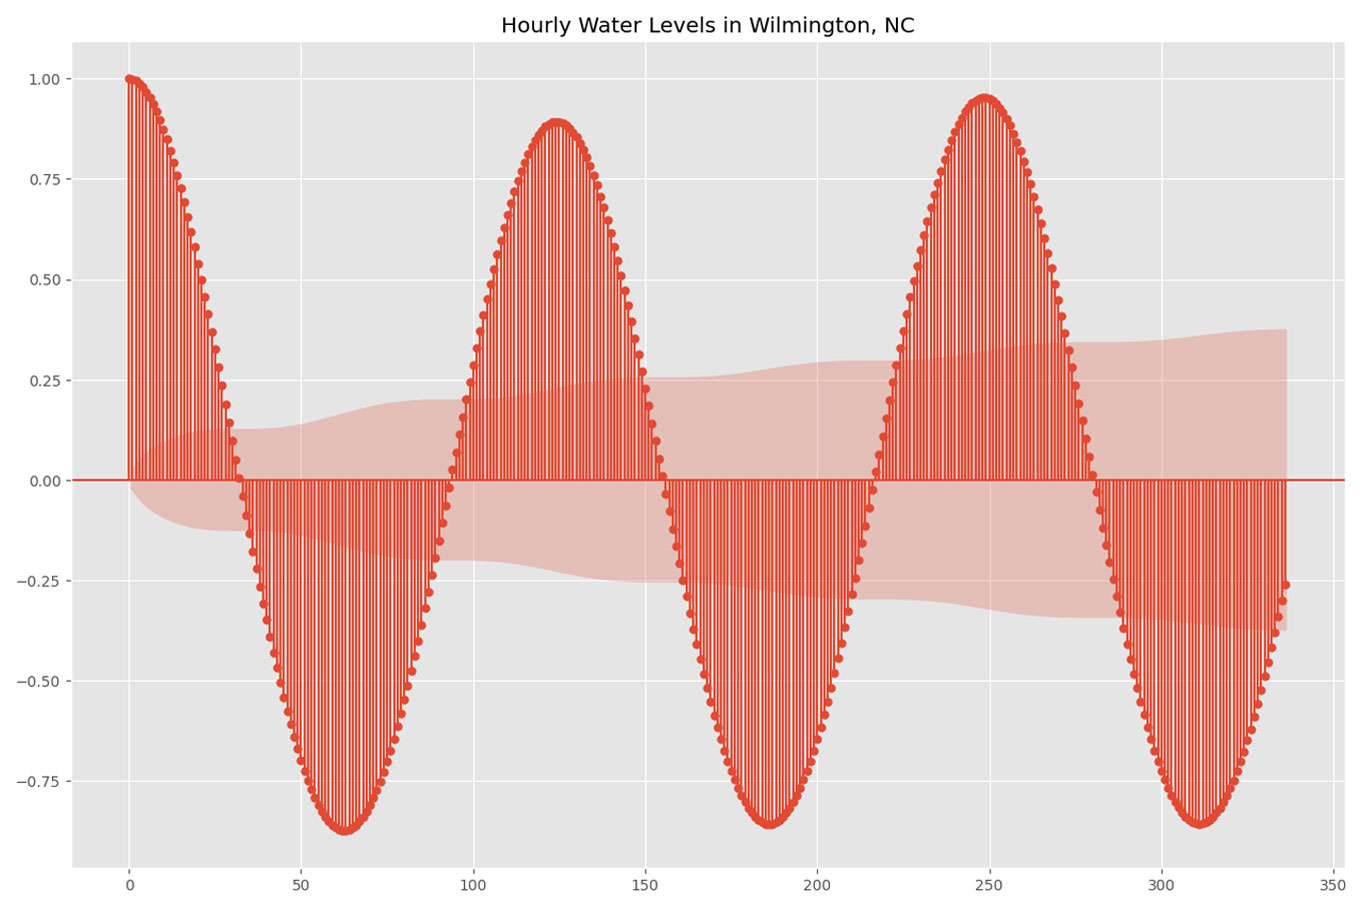


Cada punto de datos representa una medida del nivel del agua registrada en intervalos de 6 minutos (240 por día). Aquí vemos surgir una fuerte tendencia de correlación positiva y negativa. Esto es representativo de lo que esperaríamos dado lo que se ha observado durante décadas de estudio de las mareas.

La contaminación del aire
La contaminación del aire es otra aplicación común para la autocorrelación. Si bien los datos de mareas representan una periodicidad muy conocida, estos datos a menudo reflejan patrones estacionales con menos datos para predecir la frecuencia o la fuerza de la correlación. El cuadro a continuación describe los niveles máximos de CO2 observados en 8 horas para el condado de Los Ángeles, California, de 2017 a 2020.

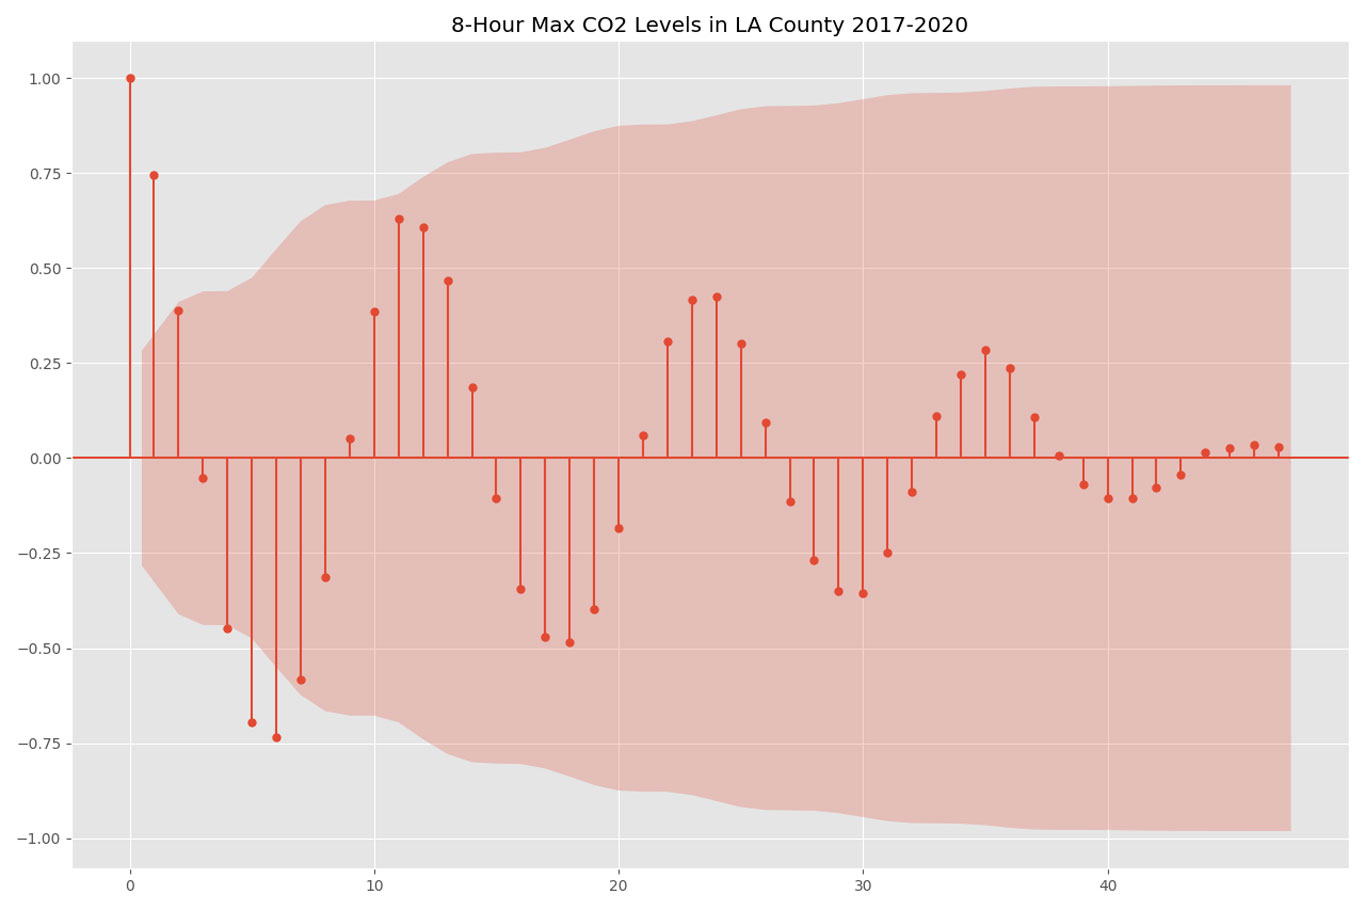

Vemos aquí que, si bien no tiene importancia estadística, existe un fuerte patrón observable en el que los valores pasados ​​pueden usarse para pronosticar valores futuros. Estos datos han sido remuestreados para reflejar los promedios mensuales. En este caso, los valores de retraso de 6 a 7 meses reflejan una fuerte correlación negativa y los valores de retraso de 6 a 7 meses reflejan una fuerte correlación positiva.

<h1>Limitaciones</h1>

La autocorrelación es una herramienta útil para detectar patrones de periodicidad, estacionalidad u otras fuentes de influencia menos intuitivas. Ninguna técnica de pronóstico es perfecta y la autocorrelación no es una excepción. Algunas áreas bien conocidas en las que la autocorrelación puede fallar se enumeran a continuación:

<h1>Demasiada información retenida</h1>

En el procesamiento de señales, los datos a menudo representan cambios sutiles o artefactos generados durante la observación. Aplicaciones como el reconocimiento de patrones de voz, el análisis de radiofrecuencia y el análisis de rayos X generan cantidades masivas de ruido. Estos puntos de datos pueden sesgar las métricas de correlación, de modo que un modelo de autocorrelación podría encontrar una influencia falsa o no capturar una influencia positiva (Fukushima, 1985; Willink, 2013)

<h1>Pensamientos finales</h1>

La autocorrelación es una herramienta útil para identificar relaciones estadísticamente significativas entre valores observados en datos lineales. Hemos visto cómo el ACF es útil para identificar tendencias estacionales o naturales, cómo se puede aplicar al análisis técnico de los datos de precios de acciones e incluso notamos algunas de sus deficiencias.

También hemos visto cómo el ACF se puede calcular y visualizar de manera rápida y efectiva en Python. Tener este tipo de herramienta estadística a mano puede ayudar a analizar e interpretar mejor los datos de manera que ayude a tomar decisiones mejor informadas. Por ejemplo, organizar su festival al aire libre en Los Ángeles cuando sus datos indican que los niveles de contaminación del aire serían más bajos.

<h1>Referencias</h1>


1.   Willink, Tricia J. “Limits on Estimating Autocorrelation Matrices from Mobile MIMO Measurements.” International Journal of Antennas and Propagation, vol. 2013, 2013, pp. 1–6.

2.   Fukushima, Teiichiro, et al. “Limitations of Autocorrelation in Fetal Heart Rate Monitoring.” American Journal of Obstetrics and Gynecology, vol. 153, no. 6, 1985, pp. 685–92.

